<a href="https://colab.research.google.com/github/hashimminhas/ML-model/blob/main/Eng_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Preprocessed Fake Reviews Detection Dataset.csv to Preprocessed Fake Reviews Detection Dataset.csv


In [ ]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40431 non-null  object
 1   rating    40431 non-null  int64 
 2   label     40431 non-null  int64 
 3   text_     40431 non-null  object
 4   length    40431 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


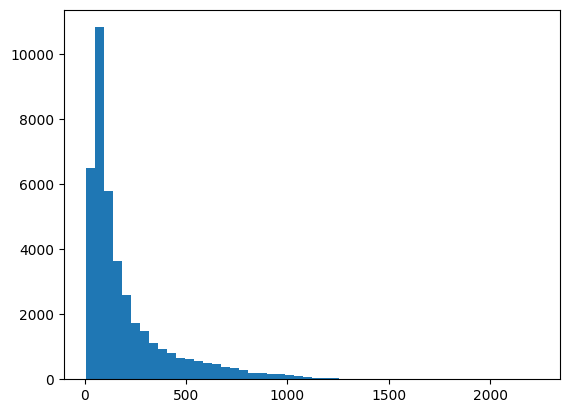

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
0      20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   
1      20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
0      237.892412  252.919324   8.0  74.0  134.0  296.0  2232.0  
1      173.638783  173.955025  13.0  57.0   99.0  217.0  1300.0

In [ ]:
df.length.describe()

count    40431.000000
mean       205.766392
std        219.421232
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7a2df3dcbf40>)

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))


Total Vocabulary: 34451


In [ ]:
review4 = df['text_'][3]
review4


'miss inform use great product price i'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)


  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32183)	1
(1, 34451)


In [ ]:
bow_reviews = bow_transformer.transform(df['text_'])


In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)


Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34451)
Amount of non zero values in the bag of words model: 1013899


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))


Sparsity: 0.07


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)


  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32183)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])


10.91422964906803
2.821684385176731


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)


Shape: (40431, 34451)
No. of Dimensions: 2


split

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.3)


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

### XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', XGBClassifier())  # Replace MultinomialNB with XGBClassifier
])

In [ ]:
print(label_train.unique())

[1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_train = label_encoder.fit_transform(label_train)

In [ ]:
pipeline.fit(review_train, label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7a2df3dcbf40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_type..._policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
predictions = pipeline.predict(review_test)


In [ ]:
print(f"Label Test Data Type: {label_test.dtype}")
print(f"Predictions Data Type: {predictions.dtype}")

Label Test Data Type: int64
Predictions Data Type: int64


In [ ]:
predictions = predictions.astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert predicted labels to strings
predictions_str = [str(label) for label in predictions]

In [ ]:
print('Classification Report:', classification_report(label_test, predictions))
print('Confusion Matrix:', confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.85      0.84      6078
           1       0.84      0.83      0.84      6052

    accuracy                           0.84     12130
   macro avg       0.84      0.84      0.84     12130
weighted avg       0.84      0.84      0.84     12130

Confusion Matrix: [[5156  922]
 [1041 5011]]
Accuracy Score: 0.8381698268755152
